# Data Analysis

## Importing Libraries

In [1]:
! pip install ipykernel
! pip install Pillow
! pip install matplotlib
! pip install numpy
! pip install pandas
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 12.1 MB 4.5 MB/s            


## Accessing the Data (Openning it from the CSV file)
Checking if the data is loaded correctly, and all the files are there or not.

In [2]:
problems_files = glob.glob('data/*.tsp')
problems = []
for prob in problems_files:
    problems.append(prob[5:])
    #print(prob[5:])

print(problems)

print(len(problems) == 10)


['ch130.tsp', 'd198.tsp', 'eil76.tsp', 'fl1577.tsp', 'kroA100.tsp', 'lin318.tsp', 'pcb442.tsp', 'pr439.tsp', 'rat783.tsp', 'u1060.tsp']
True


## Finding the Euclidean Distance
The distance between points for the edges weights. The distance between two points is the square root of the sum of the squares of the differences of the coordinates.

In [3]:
def euclidean_distance(point_1, point_2):
    point_1_x, point_1_y = point_1[0], point_1[1]
    point_2_x, point_2_y = point_2[0], point_2[1]
    distance = np.sqrt((point_1_x - point_2_x)**2 + (point_1_y - point_2_y)**2)
    roundVariable = 0
    return round(distance, roundVariable)

point_1 = (2, 2)
point_2 = (5, 5)
print(euclidean_distance(point_1, point_2))

4.0


## Reading the Data and Creating the Graph
Reading the data from the CSV file and creating the graph. The graph is created using the networkx library.

In [4]:
class CreatingGraph:
    def __init__(self, problem):
        self.problem = problem
        #self.graph = self.create_graph()

        # reading the raw data from the file
        with open (problem) as f:
            data = f.read()
            self.lines = data.splitlines()

        
        self.name = self.lines[0].split()[1]
        self.type = self.lines[1].split()[1]
        self.dimension = int(self.lines[3].split(' ')[2])
        #self.edge_weight_type = self.lines[4].split()[2]

        self.best_known = float(self.lines[5].split()[2])

        self.point = np.zeros((int(self.dimension), 3))
        for i in range(self.dimension):
            lines_i = self.lines[i+7].split(' ')
            self.point[i][0] = int(lines_i[0])
            self.point[i][1] = float(lines_i[1])
            self.point[i][2] = float(lines_i[2])
        
        #Creating the Distance Matrix of all the points
        self.distance_matrix = np.zeros((int(self.dimension), int(self.dimension)))
        for i in range(self.dimension):
            for j in range(self.dimension):
                self.distance_matrix[i][j] = euclidean_distance(self.point[i][1:], self.point[j][1:])
        


    
    def print_metatdata(self):
        print("----------------------------------\n")
        print("Name: ", self.name)
        print("Type: ", self.type)
        print("Dimension: ", self.dimension)
         #print("Edge Weight Type: ", self.edge_weight_type)
        print("Best Known: ", self.best_known)
        print("----------------------------------")
        print(self.distance_matrix[0][1])
    
    def plor_data(self):
        plt.scatter(self.point[:,1], self.point[:,2])
        plt.show()

 

## Testing out the Graph
Testing out the graph by printing the nodes and seeing if all the retrieval is fine or not.

----------------------------------

Name:  :
Type:  :
Dimension:  76
Best Known:  538.0
----------------------------------
15.0


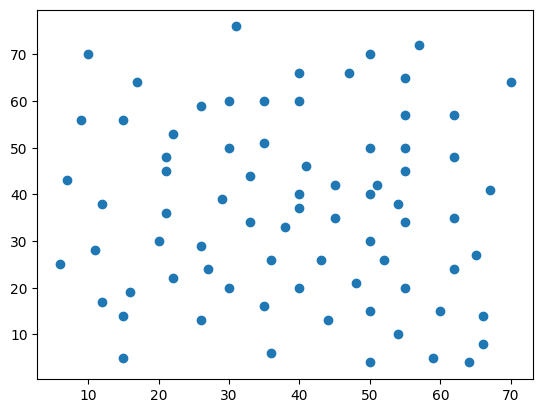

In [5]:
example_problem = "data/eil76.tsp"
CreatingGraph(example_problem).print_metatdata()
CreatingGraph(example_problem).plor_data()